<a href="https://colab.research.google.com/github/vimala2001/simple-linear-regression/blob/main/Finding_horse_power_using_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [5]:
df = pd.read_csv('/content/data.csv') # Importing the dataset
df.sample(5) #previewing dataset

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10647,Ford,Transit Connect,2015,regular unleaded,169.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Passenger Minivan,28,20,5657,25185
8171,Dodge,Ram Pickup 1500,2009,flex-fuel (unleaded/E85),310.0,8.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,19,14,1851,29530
7668,Toyota,Prius c,2015,regular unleaded,99.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,46,53,2031,21765
8904,Volvo,S60,2016,regular unleaded,302.0,4.0,AUTOMATIC,front wheel drive,4.0,"Luxury,High-Performance",Midsize,Sedan,33,23,870,43300
4676,Ford,Fiesta,2016,regular unleaded,120.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,27,5657,14880


In [6]:
print(df.shape) # view the dataset shape

print(df['Make'].value_counts()) # viewing Car companies with theirs car number

(11914, 16)
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             

In [7]:
df.describe( )


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b921a1710>,
      dtype=object)

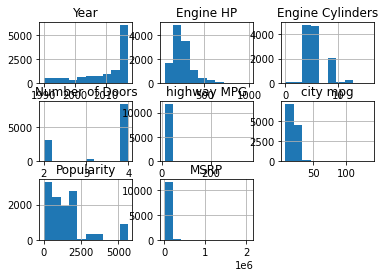

In [8]:
df.hist( )


In [9]:

new_df = df[df['Make']=='Volkswagen'] # in this new dataset we only take 'Volkswagen' Cars
print(new_df.shape) # Viewing the new dataset shape
print(new_df.isnull().sum()) # Is there any Null or Empty cell presents
new_df = new_df.dropna() # Deleting the rows which have Empty cells
print(new_df.shape) # After deletion Vewing the shape
print(new_df.isnull().sum()) #Is there any Null or Empty cell presents
new_df.sample(2) # Checking the random dataset sample

(809, 16)
Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       4
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      224
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64
(581, 16)
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1913,Volkswagen,Beetle,2015,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,33,25,873,24705
2410,Volkswagen,CC,2016,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,31,22,873,37820


In [10]:
new_df = new_df[['Engine HP','MSRP']] # We only take the 'Engine HP' and 'MSRP' columns
new_df.sample(5) # Checking the random dataset sample

,Engine HP,MSRP
10533,240.0,56670
1893,210.0,28115
7549,444.0,101300
2961,178.0,2000
5337,200.0,26695


In [11]:
X = np.array(new_df[['Engine HP']]) # Storing into X the 'Engine HP' as np.array
y = np.array(new_df[['MSRP']]) # Storing into y the 'MSRP' as np.array
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(581, 1)
(581, 1)


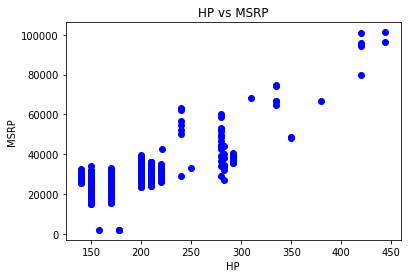

In [12]:
plt.scatter(X,y,color="blue") # Plot a graph X vs y
plt.title('HP vs MSRP')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15) # Spliting into train & test dataset
regressor = LinearRegression() # Creating a regressior
regressor.fit(X_train,y_train) # Fitting the dataset into the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

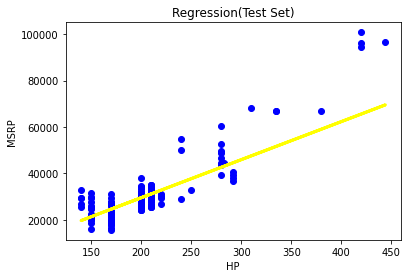

In [14]:
plt.scatter(X_test,y_test,color="blue") # Plot a graph with X_test vs y_test
plt.plot(X_train,regressor.predict(X_train),color="yellow",linewidth=3) # Regressior line showing
plt.title('Regression(Test Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

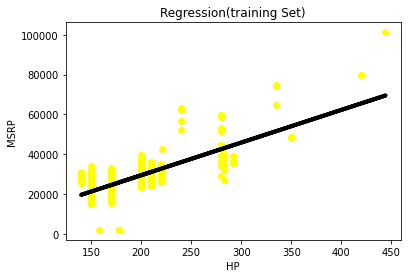

In [15]:
plt.scatter(X_train,y_train,color="yellow")  # Plot a graph with X_train vs y_train
plt.plot(X_train,regressor.predict(X_train),color="black",linewidth=4) # Regressior line showing
plt.title('Regression(training Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [16]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) # Printing R2 Score
print('Mean squared Error :',mean_squared_error(y_test,y_pred)) # Printing the mean error

R2 score: 0.73
Mean squared Error : 55796476.51179164


In [17]:
def car_price(hp): # A function to predict the price according to Horsepower
    result = regressor.predict(np.array(hp).reshape(1, -1))
    return(result[0,0])

car_hp = int(input('Enter Volkswagen cars Horse Power : '))
print('This Volkswagen Prce will be : ',int(car_price(car_hp))*69,'₹')


Enter Volkswagen cars Horse Power : 78
This Volkswagen Prce will be :  651498 ₹
